In [ ]:
from google.colab import files

uploaded = files.upload()

Saving GOOGL.csv to GOOGL.csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the Google stock prices dataset
df = pd.read_csv('GOOGL.csv')

# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)



In [ ]:
data

array([[  50.220219],
       [  54.209209],
       [  54.754753],
       ...,
       [2797.360107],
       [2765.51001 ],
       [2831.439941]])

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
test_size = len(data_normalized) - train_size
train_data, test_data = data_normalized[0:train_size,:], data_normalized[train_size:len(data_normalized),:]




In [ ]:
# Convert the time series data into sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


In [ ]:

seq_length = 10  # Sequence length
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)





In [ ]:
X_train

array([[[5.60505519e-05],
        [1.40975800e-03],
        [1.59489433e-03],
        ...,
        [3.39701332e-04],
        [4.00847389e-04],
        [4.07643771e-05]],

       [[1.40975800e-03],
        [1.59489433e-03],
        [8.25473121e-04],
        ...,
        [4.00847389e-04],
        [4.07643771e-05],
        [2.54775575e-04]],

       [[1.59489433e-03],
        [8.25473121e-04],
        [1.01740448e-03],
        ...,
        [4.07643771e-05],
        [2.54775575e-04],
        [0.00000000e+00]],

       ...,

       [[4.05809501e-01],
        [4.12186107e-01],
        [4.08721203e-01],
        ...,
        [3.82641323e-01],
        [3.81782771e-01],
        [3.86849407e-01]],

       [[4.12186107e-01],
        [4.08721203e-01],
        [4.01038108e-01],
        ...,
        [3.81782771e-01],
        [3.86849407e-01],
        [3.80608554e-01]],

       [[4.08721203e-01],
        [4.01038108e-01],
        [3.94084606e-01],
        ...,
        [3.86849407e-01],
        [3.8060

In [ ]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse normalize the predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

Epoch 1/10
111/111 [==============================] - 5s 6ms/step - loss: 0.0014
Epoch 2/10
111/111 [==============================] - 1s 5ms/step - loss: 3.6497e-05
Epoch 3/10
111/111 [==============================] - 1s 8ms/step - loss: 3.6574e-05
Epoch 4/10
111/111 [==============================] - 1s 10ms/step - loss: 3.5574e-05
Epoch 5/10
111/111 [==============================] - 1s 10ms/step - loss: 3.3871e-05
Epoch 6/10
111/111 [==============================] - 1s 7ms/step - loss: 3.4441e-05
Epoch 7/10
111/111 [==============================] - 1s 8ms/step - loss: 3.5154e-05
Epoch 8/10
111/111 [==============================] - 1s 5ms/step - loss: 3.3081e-05
Epoch 9/10
111/111 [==============================] - 1s 5ms/step - loss: 3.9575e-05
Epoch 10/10
28/28 [==============================] - 0s 2ms/step


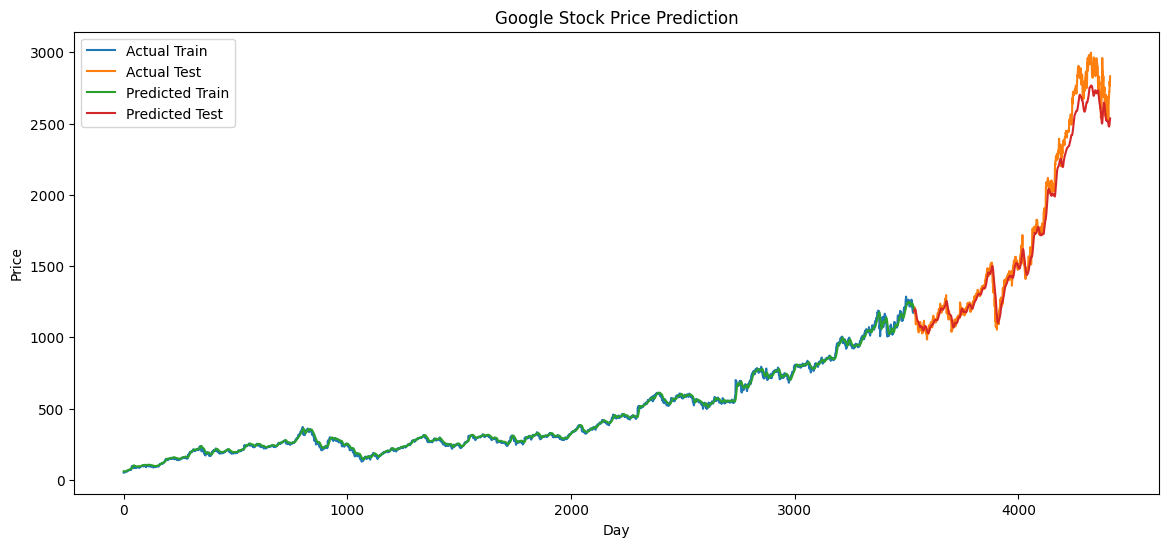

In [ ]:
#  Plot the results
plt.figure(figsize=(14, 6))
plt.plot(np.arange(0, len(y_train)), y_train, label='Actual Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='Actual Test')
plt.plot(np.arange(0, len(train_predictions)), train_predictions, label='Predicted Train')
plt.plot(np.arange(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Predicted Test')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()